# Boosting

### Classification 

1. Gradient Boosting
2. LightGBM
3. CatBost

### Regression
1. Gradient Boosting
2. LightGBM

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB


from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.metrics import mean_squared_error,r2_score

In [4]:
def model_karsilastirma_classification(gb_B, gb_A, lgbm_B, lgbm_A, catB, catA):
    print("Gradient Boosting <Before Tuning> Accurarcy : ", gb_B)
    print("Gradient Boosting <After Tuning > Accurarcy : ", gb_A)
    print("LIGHT GBM <Before Tuning> Accurarcy : ", lgbm_B)
    print("LIGHT GBM <After Tuning > Accurarcy : ", lgbm_A)
    print("Cat Boosting <Before Tuning> Accurarcy : ", catB)
    print("Cat Boosting <After Tuning > Accurarcy : ", catA)

In [5]:
# regresyon : Gradient & Light GBM 
def model_karsilastirma_regression(beforeTuning, afterTuning,lgbm_mseB,lgbm_mseA):
    print("Gradient Boosting <Before Tuning> MSE : ", beforeTuning)
    print("Gradient Boosting <After Tuning > MSE : ", afterTuning)
    print("LIGHT GBM <Before Tuning> MSE : ", lgbm_mseB)
    print("LIGHT GBM <After Tuning > MSE : ", lgbm_mseA)

In [6]:
def accurarcy_score_check(accscorebefore, accscoreafter):
    print("Before Tuning score : ", accscorebefore )
    print("After Tuning score :", accscoreafter)
    
    if(accscoreafter > accscorebefore):
        print("İyileşme oldu : ", accscoreafter-accscorebefore)

In [7]:
def impfeature_plot(x):
    Importance = pd.DataFrame({"Importance": x.feature_importances_*100},
                         index = X_train.columns)
    Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")
    plt.xlabel("Değişken Önem Düzeyleri")

In [96]:
data =pd.read_csv("hmelq.csv")
df=data.copy()
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [7]:
data.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575
reason,HomeImp,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,HomeImp,DebtCon,DebtCon,DebtCon,...,HomeImp,DebtCon,DebtCon,NaN,HomeImp,DebtCon,DebtCon,DebtCon,HomeImp,DebtCon
job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Self,Self,Self,Self,Self,Self,Self,Self,Self,Self


In [16]:
# df.isnull().sum().sort_values(ascending=False)

In [8]:
# dummy

dummy_variable=pd.get_dummies(df[['reason','job']])

y=df['bad']
X_ = df.drop(['bad','reason','job'],axis=1).astype('float64')
X = pd.concat((X_,dummy_variable),axis=1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,
                                                    random_state=42)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (1412, 18)
X_test shape (606, 18)
y_train shape (1412,)
y_test shape (606,)


# BOOSTING

# Classification

## Gradient Boosting

In [98]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [99]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [100]:
y_pred = gbm_model.predict(X_test)
accurarcy_score_before = accuracy_score(y_test, y_pred)
accurarcy_score_before

0.9455445544554455

In [101]:
gb_B = accurarcy_score_before

### Model Tuning

In [102]:
gbm_model

GradientBoostingClassifier()

In [14]:
gbm_params = {"learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2,0.3], 
              "n_estimators":[100,500,1000],
              "max_depth": [3,5,10],
              "min_samples_split":[5,10,15]
             }

gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm,gbm_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)

gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 15.4min finished


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [103]:
print("En iyi parametreler : " + str(gbm_cv.best_params_))

En iyi parametreler : {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000, 'subsample': 0.5}


In [104]:
gbm = GradientBoostingClassifier(learning_rate=0.1,
                                n_estimators=1000,
                                max_depth=10,
                                min_samples_split=15)

gbm_tuned = gbm.fit(X_train, y_train)

In [105]:
y_pred = gbm_tuned.predict(X_test)
accurarcy_score_after = accuracy_score(y_test, y_pred)
accurarcy_score_after

0.9537953795379538

In [106]:
gb_A = accurarcy_score_after 

In [107]:
accurarcy_score_check(accurarcy_score_before, accurarcy_score_after)

Before Tuning score :  0.9455445544554455
After Tuning score : 0.9537953795379538
İyileşme oldu :  0.008250825082508295


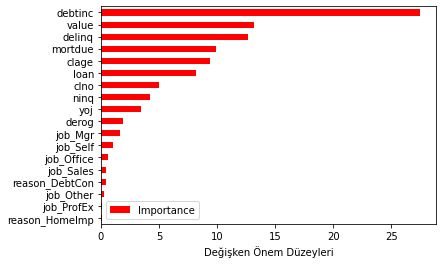

In [33]:
impfeature_plot(gbm_tuned)

# # LightGBM

In [112]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
accurarcy_score_before = accuracy_score(y_test, y_pred)
accurarcy_score_before

0.9537953795379538

In [113]:
lgbm_B = accurarcy_score_before

In [114]:
lgbm_model

LGBMClassifier()

### Tuning

In [37]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [38]:
lgbm_params = {"learning_rate": [0.1, 0.001, 0.08, 0.05, 0.2,0.3], 
              "n_estimators":[100,500,1000, 2000],
              "subsamples" : [0.6, 0.9, 1.0],
              "max_depth": [3,4,5,6],
              "min_child_samples":[5,10,20]
             }

In [40]:
lgbm = LGBMClassifier()

In [41]:
lgbm_cv = GridSearchCV(lgbm,lgbm_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)

lgbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 864 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | 

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.001, 0.08, 0.05, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsamples': [0.6, 0.9, 1.0]},
             verbose=2)

In [115]:
lgbm_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_samples': 10,
 'n_estimators': 2000,
 'subsamples': 0.6}

In [116]:
lgbm = LGBMClassifier(learning_rate=0.05,
                    subsamples = 0.6,
                    n_estimators=2000,
                    max_depth=5,
                    min_child_samples=10)

In [117]:
lgbm_tuned = lgbm.fit(X_train, y_train)

In [118]:
y_pred = lgbm_tuned.predict(X_test)
accurarcy_score_after = accuracy_score(y_test, y_pred)
accurarcy_score_after

0.9570957095709571

In [119]:
lgbm_A = accurarcy_score_after

In [120]:
accurarcy_score_check(accurarcy_score_before, accurarcy_score_after)

Before Tuning score :  0.9537953795379538
After Tuning score : 0.9570957095709571
İyileşme oldu :  0.0033003300330033403


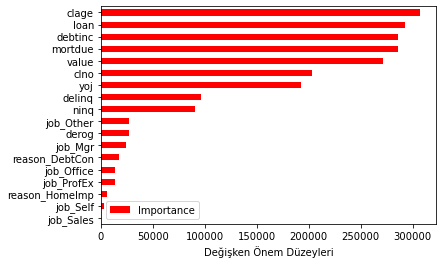

In [47]:
impfeature_plot(lgbm_tuned)

# # CatBost

In [48]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.011938
0:	learn: 0.6792768	total: 163ms	remaining: 2m 43s
1:	learn: 0.6672891	total: 165ms	remaining: 1m 22s
2:	learn: 0.6538485	total: 168ms	remaining: 55.9s
3:	learn: 0.6414647	total: 171ms	remaining: 42.5s
4:	learn: 0.6281495	total: 173ms	remaining: 34.5s
5:	learn: 0.6158322	total: 176ms	remaining: 29.1s
6:	learn: 0.6034869	total: 179ms	remaining: 25.4s
7:	learn: 0.5919529	total: 183ms	remaining: 22.6s
8:	learn: 0.5793356	total: 185ms	remaining: 20.4s
9:	learn: 0.5683025	total: 188ms	remaining: 18.6s
10:	learn: 0.5577705	total: 190ms	remaining: 17.1s
11:	learn: 0.5479991	total: 192ms	remaining: 15.8s
12:	learn: 0.5379515	total: 194ms	remaining: 14.8s
13:	learn: 0.5280629	total: 197ms	remaining: 13.9s
14:	learn: 0.5187991	total: 199ms	remaining: 13.1s
15:	learn: 0.5098705	total: 202ms	remaining: 12.4s
16:	learn: 0.5017862	total: 204ms	remaining: 11.8s
17:	learn: 0.4936010	total: 206ms	remaining: 11.2s
18:	learn: 0.4856652	total: 208ms	remaining: 10.7s
19:	learn

234:	learn: 0.1547812	total: 667ms	remaining: 2.17s
235:	learn: 0.1546573	total: 669ms	remaining: 2.17s
236:	learn: 0.1544716	total: 671ms	remaining: 2.16s
237:	learn: 0.1540651	total: 674ms	remaining: 2.16s
238:	learn: 0.1538323	total: 676ms	remaining: 2.15s
239:	learn: 0.1536468	total: 678ms	remaining: 2.15s
240:	learn: 0.1534073	total: 680ms	remaining: 2.14s
241:	learn: 0.1530914	total: 682ms	remaining: 2.14s
242:	learn: 0.1526131	total: 685ms	remaining: 2.13s
243:	learn: 0.1524170	total: 687ms	remaining: 2.13s
244:	learn: 0.1521516	total: 689ms	remaining: 2.12s
245:	learn: 0.1519362	total: 691ms	remaining: 2.12s
246:	learn: 0.1517886	total: 693ms	remaining: 2.11s
247:	learn: 0.1515828	total: 696ms	remaining: 2.11s
248:	learn: 0.1511201	total: 698ms	remaining: 2.1s
249:	learn: 0.1509229	total: 700ms	remaining: 2.1s
250:	learn: 0.1505150	total: 702ms	remaining: 2.09s
251:	learn: 0.1501716	total: 704ms	remaining: 2.09s
252:	learn: 0.1499907	total: 706ms	remaining: 2.08s
253:	learn: 0.

470:	learn: 0.1095984	total: 1.17s	remaining: 1.31s
471:	learn: 0.1095283	total: 1.17s	remaining: 1.31s
472:	learn: 0.1092576	total: 1.18s	remaining: 1.31s
473:	learn: 0.1090834	total: 1.18s	remaining: 1.31s
474:	learn: 0.1088993	total: 1.18s	remaining: 1.3s
475:	learn: 0.1086536	total: 1.18s	remaining: 1.3s
476:	learn: 0.1083978	total: 1.18s	remaining: 1.3s
477:	learn: 0.1083866	total: 1.19s	remaining: 1.29s
478:	learn: 0.1082190	total: 1.19s	remaining: 1.29s
479:	learn: 0.1080609	total: 1.19s	remaining: 1.29s
480:	learn: 0.1078583	total: 1.19s	remaining: 1.29s
481:	learn: 0.1077245	total: 1.19s	remaining: 1.28s
482:	learn: 0.1074631	total: 1.2s	remaining: 1.28s
483:	learn: 0.1073866	total: 1.2s	remaining: 1.28s
484:	learn: 0.1072437	total: 1.2s	remaining: 1.27s
485:	learn: 0.1070908	total: 1.2s	remaining: 1.27s
486:	learn: 0.1070139	total: 1.21s	remaining: 1.27s
487:	learn: 0.1069163	total: 1.21s	remaining: 1.27s
488:	learn: 0.1068331	total: 1.21s	remaining: 1.26s
489:	learn: 0.10666

630:	learn: 0.0883555	total: 1.51s	remaining: 881ms
631:	learn: 0.0882634	total: 1.51s	remaining: 879ms
632:	learn: 0.0882229	total: 1.51s	remaining: 876ms
633:	learn: 0.0881226	total: 1.51s	remaining: 873ms
634:	learn: 0.0880516	total: 1.51s	remaining: 871ms
635:	learn: 0.0878846	total: 1.52s	remaining: 868ms
636:	learn: 0.0878123	total: 1.52s	remaining: 866ms
637:	learn: 0.0876155	total: 1.52s	remaining: 864ms
638:	learn: 0.0874822	total: 1.52s	remaining: 861ms
639:	learn: 0.0873192	total: 1.53s	remaining: 859ms
640:	learn: 0.0870937	total: 1.53s	remaining: 856ms
641:	learn: 0.0869671	total: 1.53s	remaining: 853ms
642:	learn: 0.0868953	total: 1.53s	remaining: 851ms
643:	learn: 0.0868245	total: 1.53s	remaining: 848ms
644:	learn: 0.0866641	total: 1.54s	remaining: 846ms
645:	learn: 0.0865467	total: 1.54s	remaining: 843ms
646:	learn: 0.0863759	total: 1.54s	remaining: 841ms
647:	learn: 0.0863004	total: 1.54s	remaining: 838ms
648:	learn: 0.0862543	total: 1.54s	remaining: 836ms
649:	learn: 

855:	learn: 0.0667065	total: 2.01s	remaining: 338ms
856:	learn: 0.0665693	total: 2.01s	remaining: 336ms
857:	learn: 0.0665038	total: 2.02s	remaining: 334ms
858:	learn: 0.0663912	total: 2.02s	remaining: 331ms
859:	learn: 0.0662930	total: 2.02s	remaining: 329ms
860:	learn: 0.0661915	total: 2.02s	remaining: 327ms
861:	learn: 0.0661417	total: 2.02s	remaining: 324ms
862:	learn: 0.0660787	total: 2.03s	remaining: 322ms
863:	learn: 0.0660024	total: 2.03s	remaining: 320ms
864:	learn: 0.0659143	total: 2.03s	remaining: 317ms
865:	learn: 0.0658116	total: 2.04s	remaining: 315ms
866:	learn: 0.0656863	total: 2.04s	remaining: 313ms
867:	learn: 0.0656187	total: 2.04s	remaining: 310ms
868:	learn: 0.0655887	total: 2.04s	remaining: 308ms
869:	learn: 0.0655029	total: 2.04s	remaining: 305ms
870:	learn: 0.0654507	total: 2.05s	remaining: 303ms
871:	learn: 0.0653579	total: 2.05s	remaining: 301ms
872:	learn: 0.0652469	total: 2.05s	remaining: 298ms
873:	learn: 0.0651642	total: 2.05s	remaining: 296ms
874:	learn: 

In [121]:
y_pred = cat_model.predict(X_test)
accurarcy_score_before = accuracy_score(y_test, y_pred)
accurarcy_score_before

0.9570957095709571

In [122]:
catB = accurarcy_score_before

In [50]:
cat_model

### Model Tuning

In [53]:
catb_params = {"iterations": [200,500], 
              "learning_rate":[0.01, 0.05, 0.1],
              "depth" : [3,57]
             }

In [54]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb,catb_params,
                          cv=5,
                          n_jobs=-1,
                          verbose=2)

catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.5s finished


0:	learn: 0.5897409	total: 1.67ms	remaining: 834ms
1:	learn: 0.5126790	total: 3.27ms	remaining: 813ms
2:	learn: 0.4502496	total: 4.78ms	remaining: 791ms
3:	learn: 0.4095972	total: 6.36ms	remaining: 789ms
4:	learn: 0.3750301	total: 7.85ms	remaining: 777ms
5:	learn: 0.3476635	total: 9.35ms	remaining: 770ms
6:	learn: 0.3202074	total: 10.8ms	remaining: 762ms
7:	learn: 0.2997275	total: 12.3ms	remaining: 757ms
8:	learn: 0.2839228	total: 13.9ms	remaining: 756ms
9:	learn: 0.2687661	total: 15.3ms	remaining: 752ms
10:	learn: 0.2588030	total: 16.8ms	remaining: 748ms
11:	learn: 0.2519241	total: 18.3ms	remaining: 744ms
12:	learn: 0.2446942	total: 19.8ms	remaining: 741ms
13:	learn: 0.2381402	total: 21.3ms	remaining: 739ms
14:	learn: 0.2323795	total: 22.9ms	remaining: 742ms
15:	learn: 0.2289325	total: 24.4ms	remaining: 739ms
16:	learn: 0.2248650	total: 26ms	remaining: 738ms
17:	learn: 0.2207072	total: 27.5ms	remaining: 735ms
18:	learn: 0.2182947	total: 29ms	remaining: 734ms
19:	learn: 0.2158903	total

211:	learn: 0.0867512	total: 329ms	remaining: 447ms
212:	learn: 0.0863771	total: 331ms	remaining: 446ms
213:	learn: 0.0860076	total: 332ms	remaining: 444ms
214:	learn: 0.0859837	total: 334ms	remaining: 443ms
215:	learn: 0.0856272	total: 336ms	remaining: 441ms
216:	learn: 0.0852624	total: 338ms	remaining: 440ms
217:	learn: 0.0851483	total: 339ms	remaining: 439ms
218:	learn: 0.0849851	total: 341ms	remaining: 438ms
219:	learn: 0.0848290	total: 343ms	remaining: 436ms
220:	learn: 0.0845006	total: 345ms	remaining: 435ms
221:	learn: 0.0844829	total: 347ms	remaining: 434ms
222:	learn: 0.0843023	total: 349ms	remaining: 433ms
223:	learn: 0.0839683	total: 350ms	remaining: 432ms
224:	learn: 0.0836031	total: 352ms	remaining: 430ms
225:	learn: 0.0829941	total: 354ms	remaining: 429ms
226:	learn: 0.0826700	total: 356ms	remaining: 428ms
227:	learn: 0.0822678	total: 357ms	remaining: 426ms
228:	learn: 0.0820900	total: 359ms	remaining: 425ms
229:	learn: 0.0815488	total: 361ms	remaining: 423ms
230:	learn: 

400:	learn: 0.0485373	total: 653ms	remaining: 161ms
401:	learn: 0.0484889	total: 655ms	remaining: 160ms
402:	learn: 0.0483635	total: 657ms	remaining: 158ms
403:	learn: 0.0482844	total: 658ms	remaining: 156ms
404:	learn: 0.0479793	total: 660ms	remaining: 155ms
405:	learn: 0.0478557	total: 662ms	remaining: 153ms
406:	learn: 0.0475797	total: 664ms	remaining: 152ms
407:	learn: 0.0473575	total: 666ms	remaining: 150ms
408:	learn: 0.0471760	total: 667ms	remaining: 148ms
409:	learn: 0.0471498	total: 669ms	remaining: 147ms
410:	learn: 0.0467793	total: 671ms	remaining: 145ms
411:	learn: 0.0464986	total: 673ms	remaining: 144ms
412:	learn: 0.0464123	total: 675ms	remaining: 142ms
413:	learn: 0.0462923	total: 676ms	remaining: 140ms
414:	learn: 0.0461433	total: 678ms	remaining: 139ms
415:	learn: 0.0460170	total: 680ms	remaining: 137ms
416:	learn: 0.0459008	total: 682ms	remaining: 136ms
417:	learn: 0.0456632	total: 683ms	remaining: 134ms
418:	learn: 0.0455078	total: 685ms	remaining: 132ms
419:	learn: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001A8CC5EB9A0>,
             n_jobs=-1,
             param_grid={'depth': [3, 57], 'iterations': [200, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [55]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.1}

In [56]:
catb = CatBoostClassifier(learning_rate=0.1,
                    iterations=500,
                    depth=3)

In [57]:
catb_tuned = catb.fit(X_train, y_train)

0:	learn: 0.5897409	total: 1.79ms	remaining: 893ms
1:	learn: 0.5126790	total: 3.74ms	remaining: 932ms
2:	learn: 0.4502496	total: 5.57ms	remaining: 923ms
3:	learn: 0.4095972	total: 7.09ms	remaining: 879ms
4:	learn: 0.3750301	total: 8.86ms	remaining: 877ms
5:	learn: 0.3476635	total: 10.4ms	remaining: 855ms
6:	learn: 0.3202074	total: 11.8ms	remaining: 830ms
7:	learn: 0.2997275	total: 13.2ms	remaining: 813ms
8:	learn: 0.2839228	total: 14.7ms	remaining: 800ms
9:	learn: 0.2687661	total: 16.1ms	remaining: 787ms
10:	learn: 0.2588030	total: 17.5ms	remaining: 777ms
11:	learn: 0.2519241	total: 18.9ms	remaining: 768ms
12:	learn: 0.2446942	total: 20.4ms	remaining: 763ms
13:	learn: 0.2381402	total: 22.1ms	remaining: 766ms
14:	learn: 0.2323795	total: 23.6ms	remaining: 763ms
15:	learn: 0.2289325	total: 25.3ms	remaining: 765ms
16:	learn: 0.2248650	total: 26.8ms	remaining: 761ms
17:	learn: 0.2207072	total: 28.2ms	remaining: 755ms
18:	learn: 0.2182947	total: 29.6ms	remaining: 750ms
19:	learn: 0.2158903	t

239:	learn: 0.0793157	total: 336ms	remaining: 364ms
240:	learn: 0.0793006	total: 337ms	remaining: 362ms
241:	learn: 0.0785210	total: 339ms	remaining: 361ms
242:	learn: 0.0781539	total: 340ms	remaining: 360ms
243:	learn: 0.0778722	total: 341ms	remaining: 358ms
244:	learn: 0.0775872	total: 343ms	remaining: 357ms
245:	learn: 0.0774285	total: 344ms	remaining: 355ms
246:	learn: 0.0773565	total: 345ms	remaining: 354ms
247:	learn: 0.0773319	total: 347ms	remaining: 352ms
248:	learn: 0.0769571	total: 348ms	remaining: 351ms
249:	learn: 0.0765411	total: 349ms	remaining: 349ms
250:	learn: 0.0759472	total: 351ms	remaining: 348ms
251:	learn: 0.0758111	total: 353ms	remaining: 347ms
252:	learn: 0.0752687	total: 354ms	remaining: 346ms
253:	learn: 0.0751283	total: 356ms	remaining: 344ms
254:	learn: 0.0751150	total: 357ms	remaining: 343ms
255:	learn: 0.0750989	total: 358ms	remaining: 341ms
256:	learn: 0.0747447	total: 359ms	remaining: 340ms
257:	learn: 0.0745606	total: 361ms	remaining: 338ms
258:	learn: 

488:	learn: 0.0380778	total: 668ms	remaining: 15ms
489:	learn: 0.0379527	total: 669ms	remaining: 13.7ms
490:	learn: 0.0378303	total: 671ms	remaining: 12.3ms
491:	learn: 0.0377507	total: 672ms	remaining: 10.9ms
492:	learn: 0.0376408	total: 673ms	remaining: 9.56ms
493:	learn: 0.0375787	total: 675ms	remaining: 8.19ms
494:	learn: 0.0375076	total: 676ms	remaining: 6.83ms
495:	learn: 0.0373864	total: 677ms	remaining: 5.46ms
496:	learn: 0.0372527	total: 679ms	remaining: 4.09ms
497:	learn: 0.0370630	total: 680ms	remaining: 2.73ms
498:	learn: 0.0369115	total: 681ms	remaining: 1.36ms
499:	learn: 0.0367698	total: 682ms	remaining: 0us


In [123]:
y_pred = catb_tuned.predict(X_test)
accurarcy_score_after = accuracy_score(y_test, y_pred)
accurarcy_score_after

0.9587458745874587

In [124]:
catA = accurarcy_score_after

In [59]:
accurarcy_score_check(accurarcy_score_before, accurarcy_score_after)

Before Tuning score :  0.9570957095709571
After Tuning score : 0.9570957095709571


Accurarcylerde Değişme olmamış 

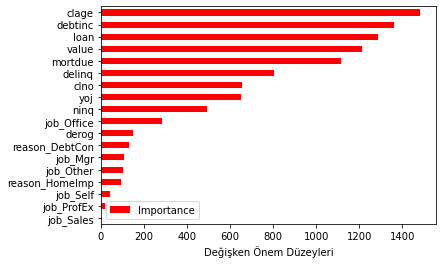

In [60]:
impfeature_plot(catb_tuned)

# Classification : Gradient & Light GBM & Cat Bost Model Sonuçları

In [130]:
model_karsilastirma_classification(gb_B, gb_A, lgbm_B, lgbm_A, catB, catA)

Gradient Boosting <Before Tuning> Accurarcy :  0.9455445544554455
Gradient Boosting <After Tuning > Accurarcy :  0.9537953795379538
LIGHT GBM <Before Tuning> Accurarcy :  0.9537953795379538
LIGHT GBM <After Tuning > Accurarcy :  0.9570957095709571
Cat Boosting <Before Tuning> Accurarcy :  0.9570957095709571
Cat Boosting <After Tuning > Accurarcy :  0.9587458745874587


# Regression

In [17]:
data = pd.read_excel("HW_Data_Set.xlsx")
df=data.copy()

In [18]:
df = df.replace('?',np.NaN)

In [19]:
df.isnull().sum().sort_values(ascending=False)

ind_422      1041
ind_420      1041
90_target       0
ind_50          0
ind_61          0
             ... 
ind_309         0
ind_310         0
ind_311         0
ind_313         0
ind_5           0
Length: 136, dtype: int64

In [11]:
df.select_dtypes(include=['float64','int64'])
df.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,6157,6158,6159,6160,6161,6162,6163,6164,6165,6166
ind_109,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,GREEN,RED,RED,...,GREEN,GREEN,GREEN,GREEN,RED,RED,RED,GREEN,GREEN,GREEN


In [24]:
y_dt = df['90_target']

dummy_dt =  pd.get_dummies(df['ind_109'])

X_dt = df.drop(["20_target","50_target","90_target", "ind_420", "ind_422","ind_109"],axis=1)
X_dt.head(0)

X_dt =pd.concat([X_dt,dummy_dt],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X_dt,y_dt,
                                               test_size=0.30,
                                               random_state=42)

In [22]:
X_train.head(1)

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,GREEN,RED
3454,-2,-2,71.428571,100.0,-28.571429,35.250941,-84.680368,15.65,13.22,10.59,...,17,-0.000663,33.7,0.0,-1,0.051643,0.318,0.333652,0,1


# Gradient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [89]:
y_pred = gbm_model.predict(X_test)
beforeTuning = np.sqrt(mean_squared_error(y_test, y_pred))
beforeTuning

0.2174532939711403

### Model Tuning 

In [91]:
gbm_params = {"learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2,0.3], 
              "n_estimators":[100,500,1000],
              "max_depth": [3,5,10,50, 80, 100 ],
              "subsample":[1, 0.5, 0.75]
             }

gbm = GradientBoostingRegressor()
gbm_cv = GridSearchCV(gbm,gbm_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)

gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 51.5min finished


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 10, 50, 80, 100],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [131]:
gbm_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 1000,
 'subsample': 0.5}

In [132]:
gbm = GradientBoostingRegressor(learning_rate=0.01,
                                n_estimators=1000,
                                max_depth=10,
                                subsample=0.5)

In [133]:
gbm_tuned = gbm.fit(X_train, y_train)

In [134]:
y_pred = gbm_tuned.predict(X_test)

afterTuning = np.sqrt(mean_squared_error(y_test, y_pred))
afterTuning

0.1913977021891402

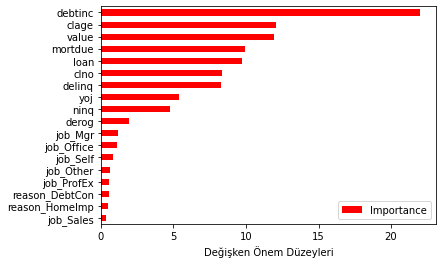

In [138]:
impfeature_plot(gbm_tuned)

# Light GBM

In [140]:
from lightgbm import LGBMRegressor

In [141]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [144]:
y_pred = lgbm_model.predict(X_test, num_iteration= lgbm_model.best_iteration_)

In [145]:
lgbm_mseB = np.sqrt(mean_squared_error(y_test,y_pred))
lgbm_mseB

0.2079614074847357

## Model Tuning

In [151]:
lgbm_model

LGBMRegressor()

In [146]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [153]:
lgbm_params = {"learning_rate": [0.001, 0.01, 1, 0.5], 
              "n_estimators":[20,40,100,200,500,1000],
              "max_depth": [2,3,5,7,8],
             "colsample_bytree":[1,0.4, 0.5, 0.6]
             }

In [154]:
lgbm = LGBMRegressor()

In [158]:
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params,
                          cv=5,
                          n_jobs=-1,
                          verbose=2)

lgbm_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 501 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 1666 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [1, 0.4, 0.5, 0.6],
                         'learning_rate': [0.001, 0.01, 1, 0.5],
                         'max_depth': [2, 3, 5, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [159]:
lgbm_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 1000}

In [163]:
lgbm_tuned = LGBMRegressor (learning_rate=0.01, 
              n_estimators=1000,
              max_depth=8,
             colsample_bytre=1)

In [164]:
lgbm_tuned = lgbm_tuned.fit(X_train, y_train)

In [165]:
y_pred = lgbm_tuned.predict(X_test)

In [166]:
lgbm_mseA = np.sqrt(mean_squared_error(y_test,y_pred))
lgbm_mseA

0.21044770673608448

# Regresyon : Gradient & Light GBM Model Sonuçları

In [167]:
model_karsilastirma_regression(beforeTuning, afterTuning,lgbm_mseB,lgbm_mseA)

Gradient Boosting <Before Tuning> MSE :  0.2174532939711403
Gradient Boosting <After Tuning > MSE :  0.1913977021891402
LIGHT GBM <Before Tuning> MSE :  0.2079614074847357
LIGHT GBM <After Tuning > MSE :  0.21044770673608448


***